In [5]:
import torch
from cirkit.symbolic.circuit import Circuit
from cirkit.symbolic.io import plot_circuit
from cirkit.symbolic.layers import InputLayer, SumLayer
from cirkit.symbolic.parameters import ReferenceParameter, TensorParameter
from cirkit.templates import data_modalities, utils
from cirkit.utils.scope import Scope
from cirkit.backend.torch.parameters.pic import pc2qpc
from cirkit.pipeline import compile as cirkit_compile

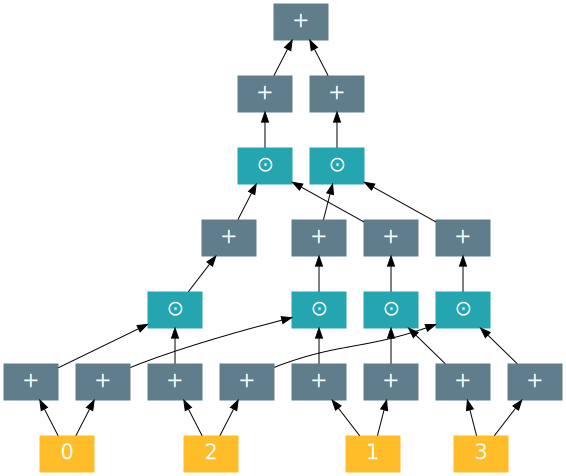

In [12]:
base_circ = data_modalities.image_data(
    (1, 2, 2),
    region_graph="quad-graph",
    input_layer="categorical",
    num_input_units=32,
    sum_product_layer="cp",
    num_sum_units=32,
    num_classes=32,
    sum_weight_param=utils.Parameterization(activation="none", initialization="normal"),
)
plot_circuit(base_circ)

In [13]:
compiled = cirkit_compile(base_circ)
compiled

TorchCircuit(
  (0): TorchCategoricalLayer(
    folds: 4  variables: 1  output-units: 32
    input-shape: (4, 1, -1, 1)
    output-shape: (4, -1, 32)
    (probs): TorchParameter(
      shape: (4, 32, 256)
      (0): TorchTensorParameter(output-shape: (4, 32, 256))
      (1): TorchSoftmaxParameter(
        input-shapes: [(4, 32, 256)]
        output-shape: (4, 32, 256)
      )
    )
  )
  (1): TorchSumLayer(
    folds: 8  arity: 1  input-units: 32  output-units: 32
    input-shape: (8, 1, -1, 32)
    output-shape: (8, -1, 32)
    (weight): TorchParameter(
      shape: (8, 32, 32)
      (0): TorchTensorParameter(output-shape: (8, 32, 32))
    )
  )
  (2): TorchCPTLayer(
    folds: 4  arity: 2  input-units: 32  output-units: 32
    input-shape: (4, 2, -1, 32)
    output-shape: (4, -1, 32)
    (weight): TorchParameter(
      shape: (4, 32, 32)
      (0): TorchTensorParameter(output-shape: (4, 32, 32))
    )
  )
  (3): TorchCPTLayer(
    folds: 2  arity: 2  input-units: 32  output-units: 32

In [14]:
pc2qpc(compiled, integration_method="trapezoidal")

In [17]:
compiled.layers[0].probs()

tensor([[[0.0059, 0.0039, 0.0039,  ..., 0.0033, 0.0043, 0.0031],
         [0.0061, 0.0050, 0.0039,  ..., 0.0035, 0.0037, 0.0035],
         [0.0062, 0.0055, 0.0039,  ..., 0.0037, 0.0034, 0.0040],
         ...,
         [0.0044, 0.0043, 0.0044,  ..., 0.0024, 0.0052, 0.0023],
         [0.0043, 0.0046, 0.0046,  ..., 0.0026, 0.0057, 0.0027],
         [0.0040, 0.0044, 0.0045,  ..., 0.0030, 0.0059, 0.0034]],

        [[0.0059, 0.0039, 0.0039,  ..., 0.0033, 0.0043, 0.0031],
         [0.0061, 0.0050, 0.0039,  ..., 0.0035, 0.0037, 0.0035],
         [0.0062, 0.0055, 0.0039,  ..., 0.0037, 0.0034, 0.0040],
         ...,
         [0.0044, 0.0043, 0.0044,  ..., 0.0024, 0.0052, 0.0023],
         [0.0043, 0.0046, 0.0046,  ..., 0.0026, 0.0057, 0.0027],
         [0.0040, 0.0044, 0.0045,  ..., 0.0030, 0.0059, 0.0034]],

        [[0.0059, 0.0039, 0.0039,  ..., 0.0033, 0.0043, 0.0031],
         [0.0061, 0.0050, 0.0039,  ..., 0.0035, 0.0037, 0.0035],
         [0.0062, 0.0055, 0.0039,  ..., 0.0037, 0.0034, 0.